In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,precision_score,f1_score,recall_score
from sklearn.ensemble import RandomForestClassifier
import pickle

In [2]:
data = pd.read_csv('water_potability.csv')

In [3]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [4]:
def data_analysis(df):
    """This function is defined for the purpose of data analysis
        in which we will first look for the missing values and replace those null values with appropriate method
    """
    nan = df.isna().sum()
    df['ph'] = df['ph'].fillna(df['ph'].mean())
    df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
    df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())
    nan = df.isna().sum()
    return nan,df
data_analysis(data)

(ph                 0
 Hardness           0
 Solids             0
 Chloramines        0
 Sulfate            0
 Conductivity       0
 Organic_carbon     0
 Trihalomethanes    0
 Turbidity          0
 Potability         0
 dtype: int64,
             ph    Hardness       Solids  Chloramines     Sulfate   
 0     7.080795  204.890456  20791.31898     7.300212  368.516441  \
 1     3.716080  129.422921  18630.05786     6.635246  333.775777   
 2     8.099124  224.236259  19909.54173     9.275884  333.775777   
 3     8.316766  214.373394  22018.41744     8.059332  356.886136   
 4     9.092223  181.101509  17978.98634     6.546600  310.135738   
 ...        ...         ...          ...          ...         ...   
 3271  4.668102  193.681736  47580.99160     7.166639  359.948574   
 3272  7.808856  193.553212  17329.80216     8.061362  333.775777   
 3273  9.419510  175.762646  33155.57822     7.350233  333.775777   
 3274  5.126763  230.603758  11983.86938     6.303357  333.775777   
 3275 

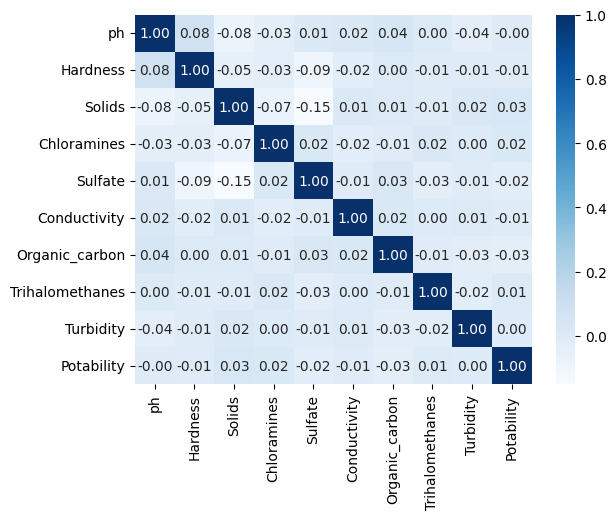

In [ ]:
def data_visualiztion(df):
    corr = df.corr()
    h_map = sns.heatmap(corr,cmap='Blues',annot=True,fmt='.2f')
    b_plot= sns.pairplot(df,hue = 'Potability')
    plt.show()
    return h_map
    return b_plot
data_visualiztion(data)

In [ ]:
def splitting_data(df):
    """In this function , We are going to split our data into X & y dataset respectively.
    Then again split the X dataset into train and test dataset and for y dataset also .
    Random Forest classification algorithm for deciding where the Water is potable or not.
    Using fit() method we train our model by providing training dataset i.e X_train,y_train. """
    
    X = df.drop('Potability',axis = 1)
    y = df['Potability']
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=2)
#     scaler = StandardScaler()
#     scaler.fit(X)
#     X_std =scaler.transform(X)
    clf = RandomForestClassifier()
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(X_train)
    print(X_test)
    print(y_train)
    print(y_test)
#     print("Standard Deviation performed on dataset X :" ,X_std.std())
    print(clf)
    print("Accuracy Score : ",accuracy_score(y_test,y_pred))
    cv_result = cross_validate(clf,X_train,y_train,cv = 5)
    print("\n",cv_result)
    clr = classification_report(y_test,y_pred)
    print("Classification Report\n :",clr)
    cm = confusion_matrix(y_test,y_pred)
    print("Confusion matrix : \n ",cm)
    cm_matrix=pd.DataFrame(data=cm, columns=['Actual Positive:1','Actual Negative:0'],index=['Predict Positive:1','Predict Negative: 0'])
    sns.heatmap(cm_matrix,cmap='Reds',annot=True,fmt="d")
    pickle.dump(clf,open('../RandomForest.pkl','wb'))
splitting_data(data)